In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install pycaret -q 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
18066,Female,78.0,0,0,No Info,27.32,6.6,159,0
30980,Male,65.0,0,0,former,25.05,4.8,145,0
62872,Female,43.0,0,0,never,24.08,3.5,200,0
43140,Male,31.0,0,0,former,31.63,4.0,126,0
26652,Female,35.0,0,0,No Info,27.32,5.8,159,0
96108,Male,50.0,0,0,never,39.49,5.8,280,1
19769,Male,72.0,0,0,not current,27.32,4.5,100,0
45811,Male,18.0,0,0,No Info,27.32,5.7,145,0
36634,Male,23.0,0,0,current,25.94,4.0,145,0
63434,Female,52.0,0,0,not current,28.29,3.5,85,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
num_duplicates = data.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 3854


In [9]:
data = data.drop_duplicates()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


# EDA

In [11]:
# Get the number of rows and columns in the DataFrame
num_rows = data.shape[0]
num_columns = data.shape[1]

# Print the number of rows and columns
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)


Number of rows:  96146
Number of columns:  9


In [12]:
data.describe() # Get general statistics of the columns

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


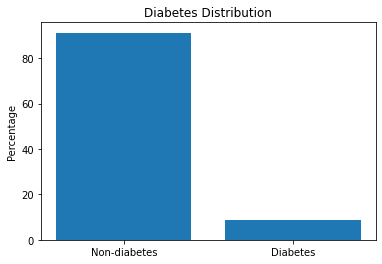

In [13]:
# Calculate the percentage of each label in the 'diabetes' column
diabetes_count = data['diabetes'].value_counts(normalize=True) * 100

# Create a bar chart
plt.bar(diabetes_count.index, diabetes_count.values)
plt.xticks([0,1], ['Non-diabetes', 'Diabetes'])
plt.ylabel('Percentage')
plt.title('Diabetes Distribution')
plt.show()

In [14]:
data.diabetes.value_counts(normalize = True).mul(100)

0    91.178
1     8.822
Name: diabetes, dtype: float64

In [15]:
for col in ['gender', 'hypertension', 'heart_disease', 'smoking_history']:
    print(data[col].value_counts())


Female    56161
Male      39967
Other        18
Name: gender, dtype: int64
0    88685
1     7461
Name: hypertension, dtype: int64
0    92223
1     3923
Name: heart_disease, dtype: int64
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64


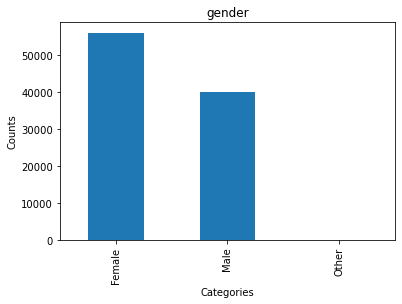

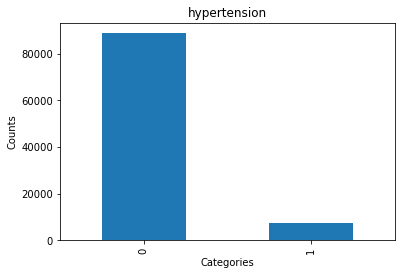

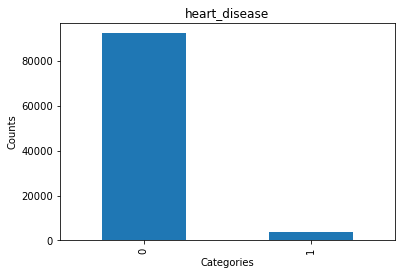

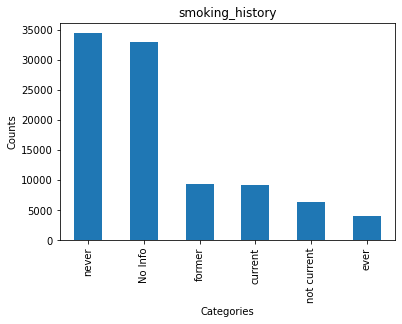

In [16]:
for col in ['gender', 'hypertension', 'heart_disease', 'smoking_history']:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Counts')

<AxesSubplot:xlabel='gender', ylabel='count'>

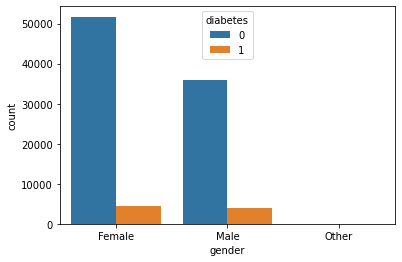

In [17]:
sns.countplot(x='gender', hue='diabetes', data=data)


<AxesSubplot:xlabel='hypertension', ylabel='count'>

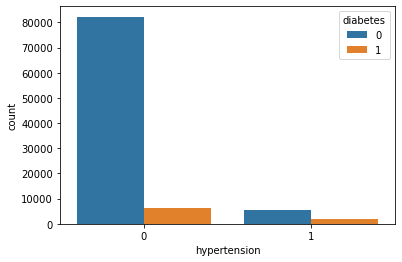

In [18]:
sns.countplot(x='hypertension', hue='diabetes', data=data)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

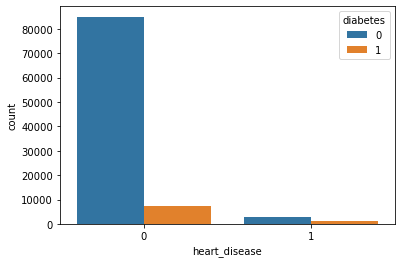

In [19]:
sns.countplot(x='heart_disease', hue='diabetes', data=data)

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

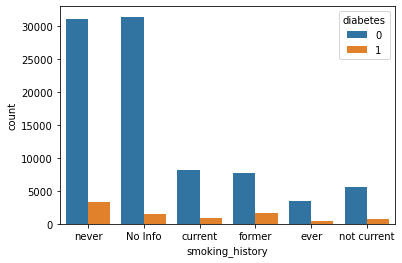

In [20]:
sns.countplot(x='smoking_history', hue='diabetes', data=data)

<AxesSubplot:xlabel='smoking_history', ylabel='count'>

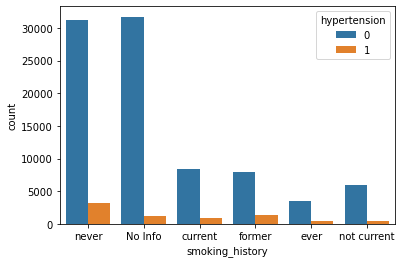

In [21]:
sns.countplot(x='smoking_history', hue='hypertension', data=data)